In [1]:
import pandas as pd

df = pd.read_csv('Data/pacific-heights.csv')
df.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zipcode
0,2243 Franklin St,2.0,2,1463,2/5/2016,1950000,37.795139,-122.425309,Pacific Heights,7,Condominium,1900,94109
1,2002 Pacific Ave APT 4,3.5,3,3291,1/22/2016,4200000,37.794429,-122.428513,Pacific Heights,7,Condominium,1961,94109
2,1945 Washington St APT 411,1.0,1,653,12/16/2015,665000,37.792472,-122.425281,Pacific Heights,3,Condominium,1987,94109
3,1896 Pacific Ave APT 802,2.5,2,2272,12/17/2014,2735000,37.794706,-122.426347,Pacific Heights,6,Condominium,1924,94109
4,1840 Washington St APT 603,1.0,1,837,12/2/2015,1050000,37.793212,-122.423744,Pacific Heights,3,Condominium,2012,94109


In [2]:
df.shape

(439, 13)

In [3]:
corr_matrix = df.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice    1.000000
finishedsqft     0.840864
bathrooms        0.768179
totalrooms       0.670726
bedrooms         0.606579
zipcode          0.296032
latitude         0.126480
yearbuilt       -0.214365
longitude       -0.309462
Name: lastsoldprice, dtype: float64

In [4]:
df = pd.get_dummies(df, columns=['usecode'])
df.head()

,address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,yearbuilt,zipcode,usecode_Condominium,usecode_Cooperative,usecode_Duplex,usecode_MultiFamily2To4,usecode_SingleFamily,usecode_Townhouse
0,2243 Franklin St,2.0,2,1463,2/5/2016,1950000,37.795139,-122.425309,Pacific Heights,7,1900,94109,1,0,0,0,0,0
1,2002 Pacific Ave APT 4,3.5,3,3291,1/22/2016,4200000,37.794429,-122.428513,Pacific Heights,7,1961,94109,1,0,0,0,0,0
2,1945 Washington St APT 411,1.0,1,653,12/16/2015,665000,37.792472,-122.425281,Pacific Heights,3,1987,94109,1,0,0,0,0,0
3,1896 Pacific Ave APT 802,2.5,2,2272,12/17/2014,2735000,37.794706,-122.426347,Pacific Heights,6,1924,94109,1,0,0,0,0,0
4,1840 Washington St APT 603,1.0,1,837,12/2/2015,1050000,37.793212,-122.423744,Pacific Heights,3,2012,94109,1,0,0,0,0,0


In [5]:
corr_matrix = df.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice              1.000000
finishedsqft               0.840864
bathrooms                  0.768179
totalrooms                 0.670726
usecode_SingleFamily       0.638482
bedrooms                   0.606579
zipcode                    0.296032
latitude                   0.126480
usecode_Duplex             0.006292
usecode_MultiFamily2To4   -0.019009
usecode_Townhouse         -0.025467
usecode_Cooperative       -0.025556
yearbuilt                 -0.214365
longitude                 -0.309462
usecode_Condominium       -0.598575
Name: lastsoldprice, dtype: float64

In [6]:
# Filter the dataset down to the most significant columns
df = df[['bathrooms', 'bedrooms', 'finishedsqft', 'totalrooms', 'usecode_Condominium', 'usecode_SingleFamily', 'lastsoldprice']]
df.head()

,bathrooms,bedrooms,finishedsqft,totalrooms,usecode_Condominium,usecode_SingleFamily,lastsoldprice
0,2.0,2,1463,7,1,0,1950000
1,3.5,3,3291,7,1,0,4200000
2,1.0,1,653,3,1,0,665000
3,2.5,2,2272,6,1,0,2735000
4,1.0,1,837,3,1,0,1050000


In [7]:
corr_matrix = df.corr()
corr_matrix["lastsoldprice"].sort_values(ascending=False)

lastsoldprice           1.000000
finishedsqft            0.840864
bathrooms               0.768179
totalrooms              0.670726
usecode_SingleFamily    0.638482
bedrooms                0.606579
usecode_Condominium    -0.598575
Name: lastsoldprice, dtype: float64

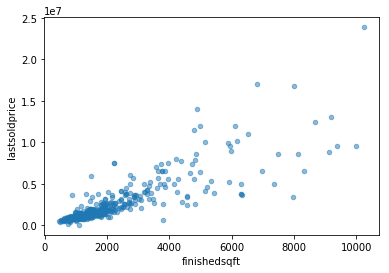

In [8]:
%matplotlib inline

df.plot(kind="scatter", x="finishedsqft", y="lastsoldprice", alpha=0.5)

In [9]:
# Split the dataset into a training set and a test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop('lastsoldprice', axis=1), df['lastsoldprice'], test_size=0.2, random_state=1234)

In [10]:
# Define the model
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, input_dim=6, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1)) 
model.compile(loss='mae', optimizer='adam', metrics=['mae'])
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________________________


In [11]:
# Train the model
hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=20)

Train on 351 samples, validate on 88 samples
Epoch 1/100
351/351 [==============================] - 1s 3ms/step - loss: 2591654.2083 - mae: 2591654.0000 - val_loss: 2224837.1818 - val_mae: 2224837.2500
Epoch 2/100
351/351 [==============================] - 0s 288us/step - loss: 2590237.4772 - mae: 2590238.0000 - val_loss: 2223305.2670 - val_mae: 2223305.2500
Epoch 3/100
351/351 [==============================] - 0s 252us/step - loss: 2588090.0264 - mae: 2588090.0000 - val_loss: 2220490.2386 - val_mae: 2220490.2500
Epoch 4/100
351/351 [==============================] - 0s 275us/step - loss: 2584095.7742 - mae: 2584096.0000 - val_loss: 2215570.2159 - val_mae: 2215570.2500
Epoch 5/100
351/351 [==============================] - 0s 259us/step - loss: 2577356.4822 - mae: 2577356.5000 - val_loss: 2207518.3523 - val_mae: 2207518.2500
Epoch 6/100
351/351 [==============================] - 0s 341us/step - loss: 2567197.6645 - mae: 2567197.5000 - val_loss: 2195254.0227 - val_mae: 2195254.0000
Epo

351/351 [==============================] - 0s 390us/step - loss: 788770.2037 - mae: 788770.1250 - val_loss: 620432.3125 - val_mae: 620432.3125
Epoch 53/100
351/351 [==============================] - 0s 366us/step - loss: 788917.8896 - mae: 788917.8125 - val_loss: 620597.0014 - val_mae: 620597.0000
Epoch 54/100
351/351 [==============================] - 0s 232us/step - loss: 788592.8638 - mae: 788592.8750 - val_loss: 620131.4020 - val_mae: 620131.4375
Epoch 55/100
351/351 [==============================] - 0s 274us/step - loss: 788779.7602 - mae: 788779.8750 - val_loss: 619645.4673 - val_mae: 619645.4375
Epoch 56/100
351/351 [==============================] - 0s 311us/step - loss: 788912.0769 - mae: 788912.0625 - val_loss: 619473.5085 - val_mae: 619473.5000
Epoch 57/100
351/351 [==============================] - 0s 256us/step - loss: 789387.0627 - mae: 789387.1250 - val_loss: 621144.0085 - val_mae: 621143.9375
Epoch 58/100
351/351 [==============================] - 0s 272us/step - loss:

[]

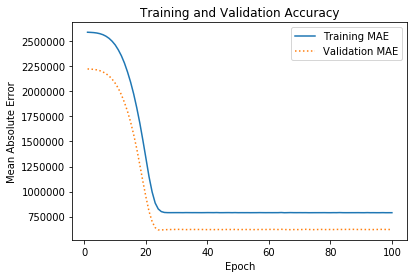

In [12]:
# Plot training accuracy and validation accuracy over time
%matplotlib inline
import matplotlib.pyplot as plt

err = hist.history['mae']
val_err = hist.history['val_mae']
epochs = range(1, len(err) + 1)

plt.plot(epochs, err, '-', label='Training MAE')
plt.plot(epochs, val_err, ':', label='Validation MAE')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend(loc='upper right')
plt.plot()

In [13]:
# Compute the R2 score
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(x_test))

0.6824128332030246

In [14]:
# Score the model
scores = model.evaluate(x_test, y_test, verbose=0)

for i in range(0, len(scores)):
    print(model.metrics_names[i] + ': ' + str(scores[i]))

loss: 620744.0397727273
mae: 620744.0625


In [15]:
# Use the model to make a prediction
import numpy as np

bathrooms = 1
bedrooms = 1
finished_sqft = 1040
total_rooms = 4
usecode_Condominium = 1
usecode_SingleFamily = 0

model.predict(np.array([[bathrooms, bedrooms, finished_sqft, total_rooms, usecode_Condominium, usecode_SingleFamily]]))

array([[1097463.9]], dtype=float32)